<a href="https://colab.research.google.com/github/Taaniya/loss-functions-in-ML/blob/main/Implementing_loss_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Softmax activation function - 
$ y_i = \frac {e^{x_i}} {\sum_je^{x_j}} $

Soft continuous version of max function. 
* This activation function makes the output of a network to represent a probability distribution.

* It amplifies the probability of the largest value $X_i$ and yet assigns some probability to the smallest value of $x_i$ 

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def computeSoftmax(z):
  exp_val = np.exp(z)
  return exp_val / exp_val.sum()

In [5]:
# Example 

a = np.array([1,2,3,4,5,6])

In [10]:
# Normal Division by Summation 
usual_proportion_result = a / a.sum()
print("Sum of all probabilities in result using Normal division by summation by all vallues {}".format(usual_proportion_result.sum()))

# Softmax result
softmax_result = computeSoftmax(a)
print("Sum of all probabilities by softmax {}".format(softmax_result.sum()))

Sum of all probabilities in result using Normal division by summation by all vallues 0.9999999999999999
Sum of all probabilities by softmax 1.0


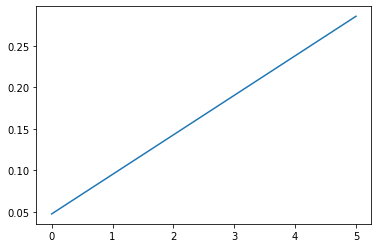

In [11]:
plt.plot(usual_proportion_result)
plt.show()

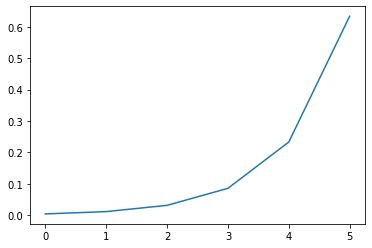

In [12]:
# It amplifies larger input values

plt.plot(computeSoftmax(a))
plt.show()

#### Why Use Cross entropy and not Mean squared Error for classification problems ?

Loss functions are decided for ML and deep learning models based on the optimization i.e classification / regression tasks.

1. For classification problems MSE is a non-convex function i.e, it may not guarantee that the training phase will lead to finding global minima of the loss. Theoretical proof can be found [here](https://towardsdatascience.com/why-not-mse-as-a-loss-function-for-logistic-regression-589816b5e03c) 

2. When the prediction probabilities and truth classes donot match eg. prediction prob = 0.0000001 for class y = 1, the resulting gradients are too small and much like plateau for minimization problem and the overall training may take very long.

3. Cross entropy or loss loss penalizes large mismatch in predictions and true class labels.

Let's plot a graph for sigmoid function - 



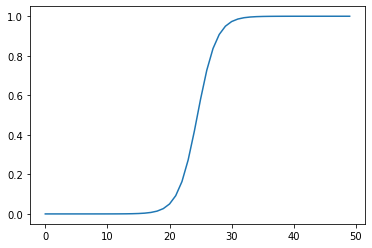

In [20]:
x_i = np.linspace(-8,8,50)
a = 2
b = 0
sigmoid_func = 1 / (1 + np.exp(-a * x_i + b))
plt.plot(sigmoid_func)
plt.show()

In [25]:
def computeMSE(target, preds):
  return (1 / len(preds)) * ((target - preds) ** 2)

def computeLogLoss(target, preds):
  return -(target*np.log(preds) + (1-target)*np.log(1-preds))


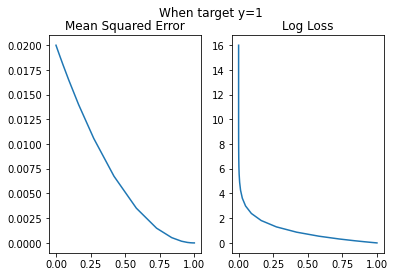

In [26]:
# When Target = 1 for Binary Classification

mse_result = computeMSE(1, sigmoid_func)
cross_entropy_result = computeLogLoss(1, sigmoid_func)

plt.subplot(1,2,1)
plt.plot(sigmoid_func, mse_result )
plt.title("Mean Squared Error")

plt.subplot(1,2,2)
plt.plot(sigmoid_func, cross_entropy_result)
plt.title("Log Loss")

plt.suptitle("When target y=1")
plt.show()

MSE loss gives very small values throughout the predictions from 0 to 1 when the actual value was 1. There isn't much difference between the loss for a strong mismatch case , when prediction is ~ 0 and when prediction reaches 1.

Whereas Loss loss highly penalizes strong mismatch cases.
This can be clear with another plot when the 2 graphs are plotted on the same scale.

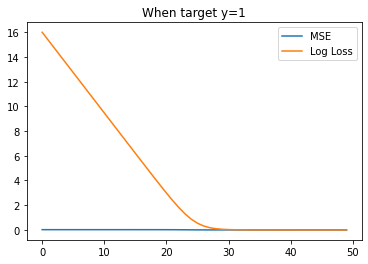

In [27]:
plt.plot(mse_result, label="MSE")
plt.plot(cross_entropy_result, label="Log Loss")
plt.title("When target y=1")
plt.legend()
plt.show()

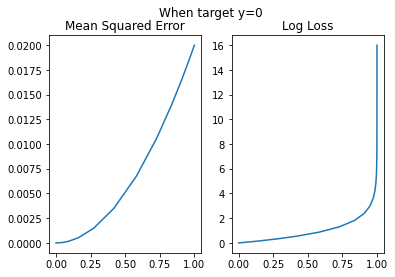

In [28]:
# When Target = 0 for Binary Classification

mse_result = computeMSE(0, sigmoid_func)
cross_entropy_result = computeLogLoss(0, sigmoid_func)

plt.subplot(1,2,1)
plt.plot(sigmoid_func, mse_result )
plt.title("Mean Squared Error")

plt.subplot(1,2,2)
plt.plot(sigmoid_func, cross_entropy_result)
plt.title("Log Loss")

plt.suptitle("When target y=0")
plt.show()

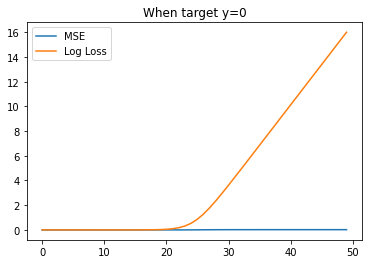

In [29]:
plt.plot(mse_result, label="MSE")
plt.plot(cross_entropy_result, label="Log Loss")
plt.title("When target y=0")
plt.legend()
plt.show()

References - 

1. Stanford course - NLP with Deep Learning